In [38]:
#importing the packages i will be using for the analysis
#import Pandas
import  pandas as pd

#import Numpy
import numpy as np

# Import matplotlib
import matplotlib.pyplot as plt

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

#import seaborn
import seaborn as sns


In [39]:
basics_df =pd.read_csv( 'title.basics.csv', index_col=0)
basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [40]:
#basics_df['start_year'].value_counts()

In [41]:
movies_df =pd.read_csv( 'tmdb.movies.csv', index_col=0)
movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [42]:
#movies_df.info()

In [50]:
movie_info_df = pd.read_csv('rt.movie_info.tsv',sep = '\t')
df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [43]:
#movie_info_df.info()

In [44]:
#movie_info_df['genre'].value_counts()

In [45]:
#movie_info_df['box_office']

In [46]:
#movie_info_df['studio'].value_counts()

In [34]:
#studio_df = movie_info_df[['studio','genre']]

In [61]:
movie_budget_df=pd.read_csv('tn.movie_budgets.csv', index_col=0)
movie_budget_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


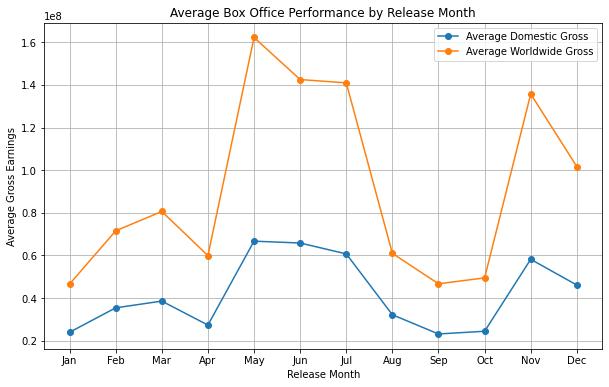

In [52]:

# Assuming your movie budget DataFrame is already loaded as 'movie_budget_df'

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Extract month and year from the 'release_date' column
movie_budget_df['release_month'] = pd.to_datetime(movie_budget_df['release_date']).dt.month
movie_budget_df['release_year'] = pd.to_datetime(movie_budget_df['release_date']).dt.year

# Group the data by release month and calculate the average domestic and worldwide gross
monthly_avg_gross = movie_budget_df.groupby('release_month').agg({
    'domestic_gross': 'mean',
    'worldwide_gross': 'mean'
}).reset_index()

# Sort the data by release month for proper plotting
monthly_avg_gross = monthly_avg_gross.sort_values('release_month')

# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_gross['release_month'], monthly_avg_gross['domestic_gross'], marker='o', label='Average Domestic Gross')
plt.plot(monthly_avg_gross['release_month'], monthly_avg_gross['worldwide_gross'], marker='o', label='Average Worldwide Gross')
plt.xlabel('Release Month')
plt.ylabel('Average Gross Earnings')
plt.title('Average Box Office Performance by Release Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the correlation coefficient between 'production_budget' and 'domestic_gross'
correlation_domestic = movie_budget_df['production_budget'].corr(movie_budget_df['domestic_gross'])

# Calculate the correlation coefficient between 'production_budget' and 'worldwide_gross'
correlation_worldwide = movie_budget_df['production_budget'].corr(movie_budget_df['worldwide_gross'])

print("Correlation between Production Budget and Domestic Gross:", correlation_domestic)
print("Correlation between Production Budget and Worldwide Gross:", correlation_worldwide)


Correlation between Production Budget and Domestic Gross: 0.6856818396752735
Correlation between Production Budget and Worldwide Gross: 0.7483059765694753


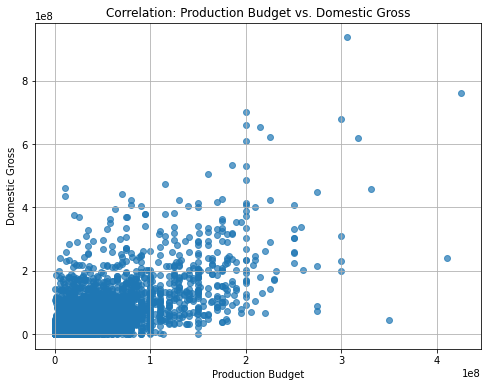

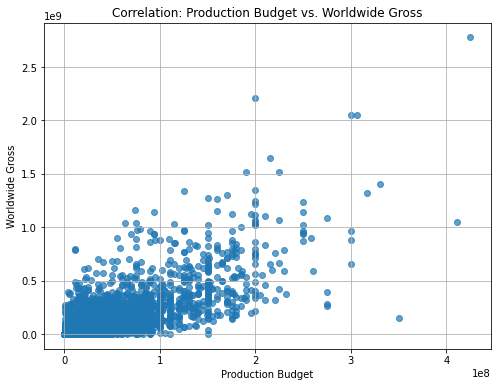

In [55]:
# Create scatter plot for 'production_budget' vs. 'domestic_gross'
plt.figure(figsize=(8, 6))
plt.scatter(movie_budget_df['production_budget'], movie_budget_df['domestic_gross'], alpha=0.7)
plt.xlabel('Production Budget')
plt.ylabel('Domestic Gross')
plt.title('Correlation: Production Budget vs. Domestic Gross')
plt.grid(True)
plt.show()

# Create scatter plot for 'production_budget' vs. 'worldwide_gross'
plt.figure(figsize=(8, 6))
plt.scatter(movie_budget_df['production_budget'], movie_budget_df['worldwide_gross'], alpha=0.7)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Correlation: Production Budget vs. Worldwide Gross')
plt.grid(True)
plt.show()

In [56]:


# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

# Identify top-grossing movies based on domestic gross
top_domestic_gross_movies = movie_budget_df.sort_values(by='domestic_gross', ascending=False).head(10)

# Identify top-grossing movies based on worldwide gross
top_worldwide_gross_movies = movie_budget_df.sort_values(by='worldwide_gross', ascending=False).head(10)

# Identify highest production budget films
highest_production_budget_movies = movie_budget_df.sort_values(by='production_budget', ascending=False).head(10)

# Display the results
print("Top-Grossing Movies based on Domestic Gross:")
print(top_domestic_gross_movies[['movie', 'domestic_gross']])
print("\nTop-Grossing Movies based on Worldwide Gross:")
print(top_worldwide_gross_movies[['movie', 'worldwide_gross']])
print("\nHighest Production Budget Films:")
print(highest_production_budget_movies[['movie', 'production_budget']])

Top-Grossing Movies based on Domestic Gross:
                                   movie  domestic_gross
id                                                      
6   Star Wars Ep. VII: The Force Awakens     936662225.0
1                                 Avatar     760507625.0
42                         Black Panther     700059566.0
7                 Avengers: Infinity War     678815482.0
43                               Titanic     659363944.0
34                        Jurassic World     652270625.0
27                          The Avengers     623279547.0
5      Star Wars Ep. VIII: The Last Jedi     620181382.0
44                         Incredibles 2     608581744.0
75                       The Dark Knight     533720947.0

Top-Grossing Movies based on Worldwide Gross:
                                            movie  worldwide_gross
id                                                                
1                                          Avatar     2.776345e+09
43                     

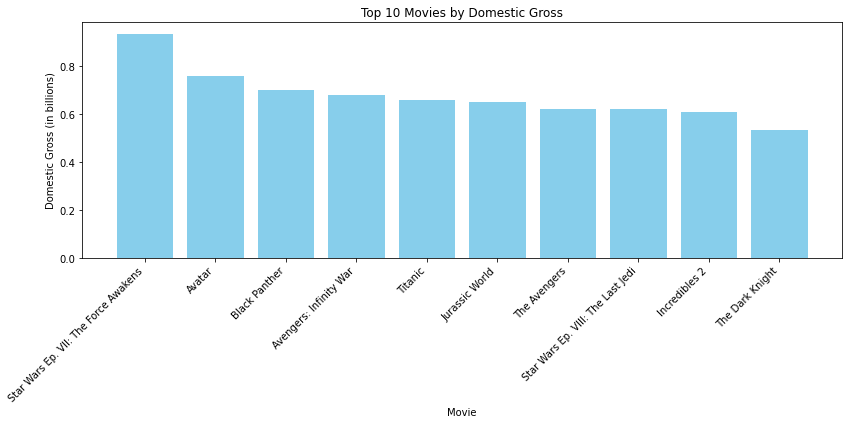

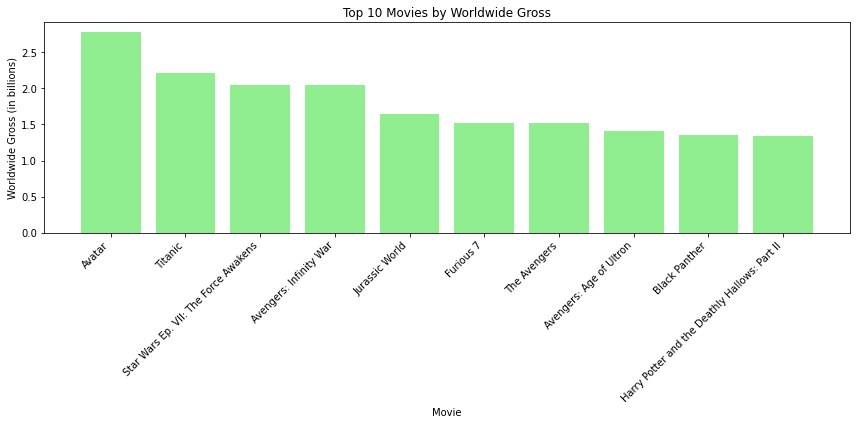

In [58]:
# Data Visualization - Bar plot for top-grossing movies based on domestic gross
plt.figure(figsize=(12, 6))
plt.bar(top_domestic_gross_movies['movie'], top_domestic_gross_movies['domestic_gross'] / 1e9, color='skyblue')
plt.xlabel('Movie')
plt.ylabel('Domestic Gross (in billions)')
plt.title('Top 10 Movies by Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Data Visualization - Bar plot for top-grossing movies based on worldwide gross
plt.figure(figsize=(12, 6))
plt.bar(top_worldwide_gross_movies['movie'], top_worldwide_gross_movies['worldwide_gross'] / 1e9, color='lightgreen')
plt.xlabel('Movie')
plt.ylabel('Worldwide Gross (in billions)')
plt.title('Top 10 Movies by Worldwide Gross')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()







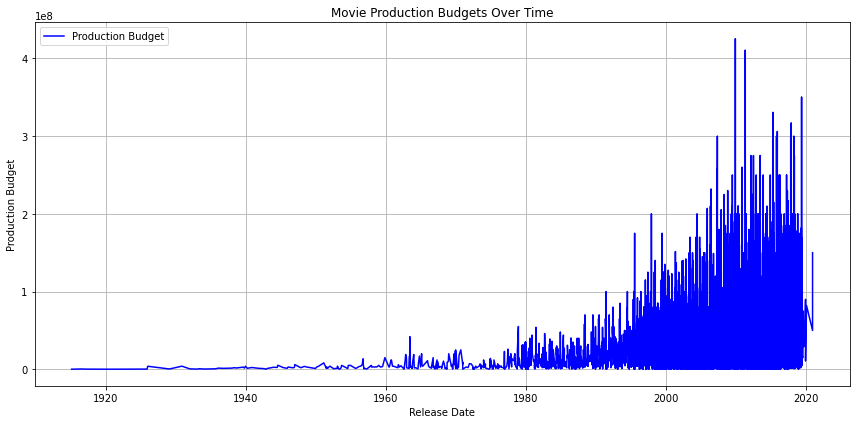

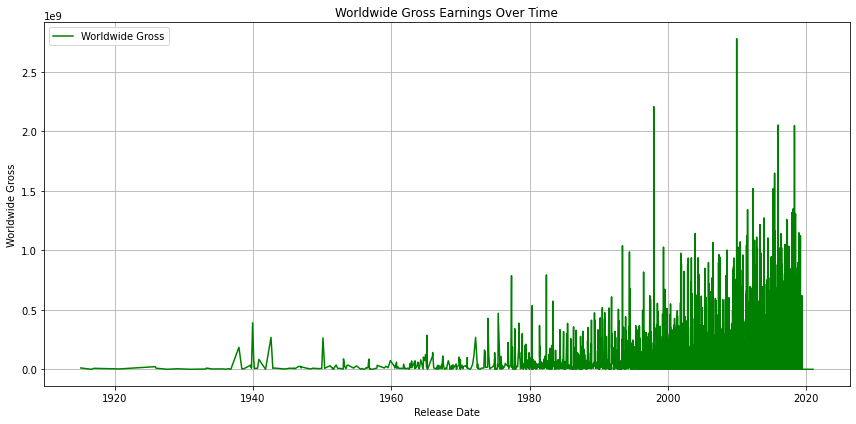

In [59]:

# Convert 'release_date' to a proper date format
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

# Set 'release_date' as the DataFrame index (for time series analysis)
movie_budget_df.set_index('release_date', inplace=True)

# Sort the DataFrame by the 'release_date' index in ascending order
movie_budget_df.sort_index(ascending=True, inplace=True)

# Data Visualization - Line plot for movie budgets over time
plt.figure(figsize=(12, 6))
plt.plot(movie_budget_df.index, movie_budget_df['production_budget'], label='Production Budget', color='blue')
plt.xlabel('Release Date')
plt.ylabel('Production Budget')
plt.title('Movie Production Budgets Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Data Visualization - Line plot for worldwide gross earnings over time
plt.figure(figsize=(12, 6))
plt.plot(movie_budget_df.index, movie_budget_df['worldwide_gross'], label='Worldwide Gross', color='green')
plt.xlabel('Release Date')
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross Earnings Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

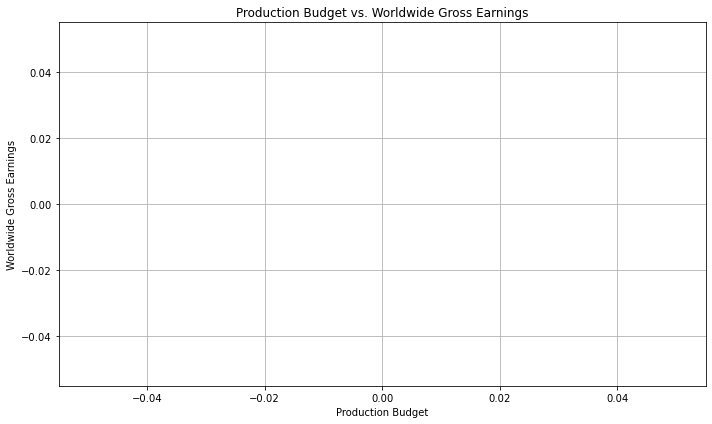

Empty DataFrame
Columns: [release_date, movie, production_budget, domestic_gross, worldwide_gross, primary_title, original_title, start_year, runtime_minutes, genres]
Index: []


In [62]:
# Convert 'release_date' in movie_budget_df to a proper date format (if not already done)
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'])

# Merge 'movie_budget_df' and 'basics_df' based on the common identifier 'tconst'
combined_df = movie_budget_df.merge(basics_df, left_index=True, right_index=True)

# Data Cleaning: Remove rows with NaN values in important columns (e.g., 'production_budget', 'domestic_gross', 'worldwide_gross', 'runtime_minutes')
combined_df.dropna(subset=['production_budget', 'domestic_gross', 'worldwide_gross', 'runtime_minutes'], inplace=True)

# Summary Statistics for combined data
combined_stats = combined_df.describe()

# Data Visualization
# For example, let's create a scatter plot of production budgets vs. worldwide gross earnings
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['production_budget'], combined_df['worldwide_gross'], alpha=0.7)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross Earnings')
plt.title('Production Budget vs. Worldwide Gross Earnings')
plt.grid(True)
plt.tight_layout()
plt.show()

# Additional Visualizations and Analysis
# You can perform further visualizations and analysis on the combined data as per your specific questions and interests.
# For example, analyze the relationship between genres and worldwide gross earnings, or explore trends over time, etc.

# Sample of the combined DataFrame (if needed)
print(combined_df.head())